In [1]:
import mpldatacursor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
from ciexyz import xyz_from_spectrum
from colormodels import irgb_from_xyz
import csv

In [3]:
wavel_df = pd.read_csv('long_de_onda_1_tira.csv')
#inten_arriba_df = pd.read_csv('inten_paso_50micrones_arriba.csv',header=None)
#inten_abajo_df = pd.read_csv('inten_50micr_abajo_selected.csv',header=None)

In [3]:
inten_abajo_df = inten_abajo_df.iloc[221:,:]

In [ ]:
#inten_abajo_array = inten_abajo_df.iloc[:,:].values
#inten_arriba_array = inten_arriba_df.iloc[:, :].values

In [ ]:
#print(np.shape(inten_abajo))
#print(np.shape(inten_arriba))

In [4]:
frames = [inten_abajo_df,inten_arriba_df]
inten_df = pd.concat(frames)

In [ ]:
inten_df

In [4]:
wavel_array = wavel_df.iloc[:, 0].values
#inten_array = inten_df.iloc[1:, 0:].values
#print(np.shape(inten_array))
#print(np.shape(wavel_array))

In [9]:
RGB_up_df = pd.read_csv('RGB_colors_50micron_arriba.csv',header=None)
RGB_down_df = pd.read_csv('RGB_colors_50micron_abajo.csv',header=None)
RGB_frames = [RGB_down_df,RGB_up_df]
RGB_df = pd.concat(RGB_frames)
RGB_df = RGB_df.iloc[1:,:]

In [31]:
xy_pos_df = pd.read_csv('xy_positions_FULL50micron.csv',header=None)
xy_pos_df = xy_pos_df.iloc[231:,:]
print(np.shape(xy_pos_df))
print(np.shape(RGB_df))

(127920, 2)
(127920, 3)


In [5]:
RGB_df = pd.read_pickle('RGB_fin.pkl')
R_array = RGB_df.iloc[:,0].values
G_array = RGB_df.iloc[:,1].values
B_array = RGB_df.iloc[:,2].values

R = R_array.reshape(492,260)
G = G_array.reshape(492,260)
B = B_array.reshape(492,260)
img = np.empty((492,260,3), dtype=np.uint8)
img[:,:,0] = R
img[:,:,1] = G
img[:,:,2] = B

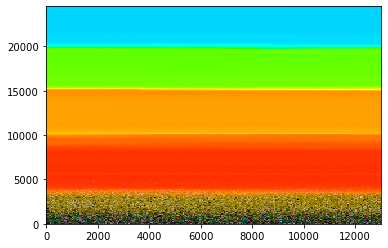

In [6]:
im = plt.imshow(img,interpolation='none',origin = 'lower', aspect='auto',extent=[0.0, 13000.0, 0, 24500.0])
plt.show()

In [27]:
dx = 50 #en micrones, luego son pasados a mm
dy = 50
x_array = np.arange(0.0,dx*(260+1),dx)
y_array = np.arange(0.0,dy*(490+1),dy)


x_positions = []
y_positions = []

for ndx, y in enumerate(y_array):
    if ndx % 2:
        for x in reversed(x_array):
            x_positions.append(x)
            y_positions.append(y)
    else:
        for x in x_array:
            x_positions.append(x)
            y_positions.append(y)

with open("xy_positions_FULL50micron.csv", "w") as csv_file:   
    writer = csv.writer(csv_file, delimiter=',')
    level_counter = 0
    max_levels = len(x_positions)
    while level_counter < max_levels:
        writer.writerow((x_positions[level_counter], y_positions[level_counter])) 
        level_counter = level_counter +1


In [ ]:
list_of_colors = []

for row in range(len(inten_array)):
    spectra = np.column_stack((wavel_array,inten_array[row,:]))
    xyz_color_vec = xyz_from_spectrum(spectra)
    rgb_disp = irgb_from_xyz(xyz_color_vec)
    list_of_colors.append(rgb_disp)

rgb_matrix = np.asarray(list_of_colors)

with open('RGB_colors_50micron_arriba.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(rgb_matrix)

csvFile.close()

In [ ]:
RGB_file = pd.read_csv('RGB_colors_50micron_arriba.csv',header=None)

In [ ]:
print(np.shape(xy_pos_file))
print(np.shape(RGB_file))